# Actividad: Determinación de la aceleración de la gravedad g


## Física Experimental III
### Santiago Moreno González
*Estudiante de Física*<br>
*CC. 1007290873*

In [1]:
# Librerías a utilizar

import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd

***Nota :***  *para mostar u ocultar el código hacer uso del botón en la parte superior izquierda.*

### 1.

Se tomaron 30 datos correspondientes a la caída de una pelota de tenis desde una altura de $(2.000 \pm 0.001)$m. Dado que el cronómetro se iniciaba y se detenía a partir de la audición de dos eventos, entonces no fue necesario corregir los datos restandoles $0.17$s de retraso, ya que como se verá en los siguientes numerales este método para realizar el experimento indirectamente suprimió este error sistemático.  A continuación se presentan los datos registrados, cada número representa el valor númerico de un tiempo de caida. Los datos se leen en orden de izquierda a derecha, y de arriba a abajo. Los errores que tienen estos tiempos de acuerdo con la sensibilidad del cronómetro es $\pm 0.01$s.

In [8]:
# Datos medidos con cronómetro de la caida de un objeto desde una altura de (200.0 +/- 0.1) cm

stopwatch_data = np.array([0.55, 0.75, 0.58, 0.65, 0.62, 0.60, 0.68, 0.52, 0.57, 0.51,
                           0.57, 0.67, 0.65, 0.65, 0.72, 0.63, 0.58, 0.61, 0.75, 0.63,
                           0.62, 0.75, 0.55, 0.63, 0.75, 0.77, 0.75, 0.73, 0.55, 0.75]) # (s)

# Sensibilidad del cronómetro

stopwatch_error = 0.01 # (s)


# Para imprimir los datos en forma de tabla

# Se crea matriz vacía donde se guardan los datos por columnas

time_matrix = [[], [], [], [], [], []]

# Se recorre el array de los tiempos tomados para guardarlos en la matriz

for i in range(len(time_matrix)):
    for j in range(5):
        time_matrix[i].append(stopwatch_data[(j * len(time_matrix)) + i])
    

data_dictionary = {} # diccionario vacío para crear un data frame
column_header = [] # lista vacía para los nombres de las columnas

# Se guardan los elementos de la matriz como las columnas que tendrá el dataframe
for i in range(len(time_matrix)):
    data_dictionary[str(i + 1)] = list(time_matrix[i]) 
    column_header.append(str(i + 1))

# Se crea el Dataframe
df = pd.DataFrame (data_dictionary, columns = column_header)

def print_df(df):
    # Función para imprimir el dataframe sin los nombres de las columnas
    # ni la columna de índices
    df_ = df.copy()
    df_.columns = ['', '', '', '', '', '']
    df_.index = ['' for _ in range(len(df))]
    print(df_)

print('\nDatos correspondientes a los tiempos tomados en segundos:\n')
print_df(df)


Datos correspondientes a los tiempos tomados en segundos:

                                    
  0.55  0.75  0.58  0.65  0.62  0.60
  0.68  0.52  0.57  0.51  0.57  0.67
  0.65  0.65  0.72  0.63  0.58  0.61
  0.75  0.63  0.62  0.75  0.55  0.63
  0.75  0.77  0.75  0.73  0.55  0.75


<a id='segundo'></a>
### 2.
Se calcula el valor medio de los tiempos tomados con cronómetro. Se presenta la gráfica de los residuos de los 30 datos temporales con respecto a la media. La distribución de estos en el eje $x$ es el orden que tienen en el arreglo original de los tiempos.



Valor medio de los tiempos registrados con el cronómetro: ( 0.64 ± 0.02 ) s

Gráfica de los residuos de los tiempos con respecto al valor medio:



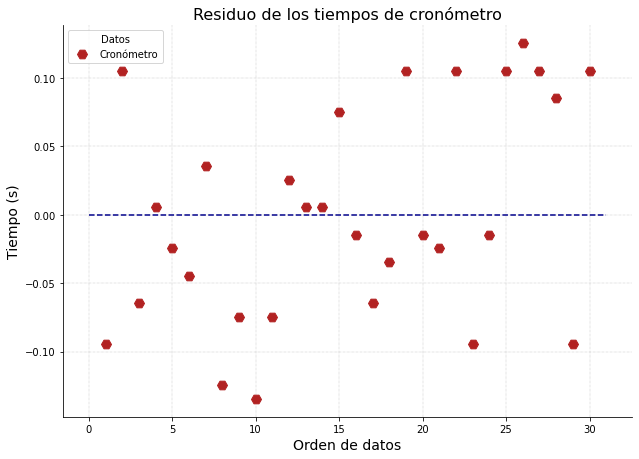

In [11]:
# Se calcula la media de los datos

mean_stopwatch_time = np.mean(stopwatch_data)


# Función para calcular la desviación estándar de la media

calculate_mean_deviation = lambda x, x_mean, n: np.sqrt((1 / (n - 1)) * np.sum((x - x_mean)**2)) / np.sqrt(n)

# Función para el error de la media

calculate_mean_error = lambda x, x_mean, x_error: np.sqrt(calculate_mean_deviation(x, x_mean, len(x))**2 + x_error**2)


# Se calcula el error sobre la media de los datos de tiempo

mean_stopwatch_error = calculate_mean_error(stopwatch_data, mean_stopwatch_time, stopwatch_error)

# Se redondea a 1 cifra significativa

mean_stopwatch_error =  np.round(mean_stopwatch_error, 2)

# Resultado

print('\nValor medio de los tiempos registrados con el cronómetro: (', np.round(mean_stopwatch_time, 2),'±', mean_stopwatch_error, ') s')

# Se calcula los residuos con respecto a la media

stopwatch_residue = stopwatch_data - mean_stopwatch_time

data_order = np.arange(1,31) # Array para el eje x como el orden de los datos

# Gráfica de los residuos

print('\nGráfica de los residuos de los tiempos con respecto al valor medio:\n')

plt.figure(figsize = (10.2,7.2)) # Para ajustar el tamaño de la gráfica
# Plot del conjunto de datos experimentales y simulados
plt.plot(data_order, stopwatch_residue, color = 'firebrick', marker = 'H', ms = 10, ls = 'None', label = 'Cronómetro')
plt.hlines(0,0,31,colors='darkblue',ls='--') # Para crear línea punteada en y = 0
plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Residuo de los tiempos de cronómetro', fontsize = 16) # Título
plt.xlabel('Orden de datos', fontsize = 14) # label eje x
plt.ylabel('Tiempo (s)', fontsize = 14) # label eje y
plt.legend(title = 'Datos')
plt.show()

A partir de esta gráfica se puede observar que los datos son aparentemente aleatorios, ya que no se identifica un patrón o tendencia clara de su distribución alrededor de la línea del $0$. Además, se puede notar que dentro del conjunto de datos originales no hay ningún valor tan alejado de esta línea como para que sea necesario considerarlo sesgado y retirarlo.

<a id='tercero'></a>
### 3.

Los datos temporales tomados con el crónometro se agrupan de manera aleatoria en un conjunto de $5$ datos, uno de $15$ y en su totalidad, y con cada uno de estos tres grupos se determina la aceleración promedio con su error estándar. Luego, se presenta una gráfica del valor promedio con barras de error de un error estándar, 3 errores estándar, y con la corrección de t-student para una incerteza del 0.27%. En estas gráficas se muestra un error aceptado para la gravedad de $9.77$m/s$^2$. A pesar de que el experimento se realiza en Marinilla se toma esta valor (de Medellín) como aceptado ya que se desconoce cuál sea un valor ideneo en el municipio, por lo que se asume que el cambio de altura no sea lo suficientemente grande como para afectar de manera significativa este valor utilizado.

In [13]:
# Datos de la altura en m

height = 2 # (m)

height_error = 1e-3 # (m)

# Función para calcular la aceleración gravitacional

calculate_acceleration = lambda d, t: (2 * d) / (t**2) # d: distancia, t: tiempo 


# Se calcula un array con las aceleraciones correspondientes a cada tiempo cronometrado

acceleration_sp_array = calculate_acceleration(height, stopwatch_data)


# Se crea una semilla para fijar los valores aleatorios que se generen 

np.random.seed(10)


# Agrupación de los datos de manera aleatoria

# Lista con los índices del grupo de 5 datos

five_group_index = np.random.choice(range(30), 5, replace=False) # sin valores repetidos

# Lista vacía para almacenar los valores del grupo de 5
five_group = []
for index in five_group_index:
    five_group.append(acceleration_sp_array[index]) # Se anexan los 5 valores elegidos aleatoriamente

five_group = np.array(five_group)

# Lista con los índices del grupo de 15 datos

fifteen_group_index = np.random.choice(range(30), 15, replace=False) # sin valores repetidos

# Lista vacía para almacenar los valores del grupo de 15
fifteen_group = []
for index in fifteen_group_index:
    fifteen_group.append(acceleration_sp_array[index]) # Se anexan los 15 valores elegidos aleatoriamente

fifteen_group = np.array(fifteen_group)

# Valor aceptado para la aceleración
accepted_g = 9.77


Grupo de 5 datos:

Valor de la aceleración promedio: 11.533579964978362 m/s^2
Valor del error estándar: 0.907463691174339 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 5 datos, con los tres errores distintos:


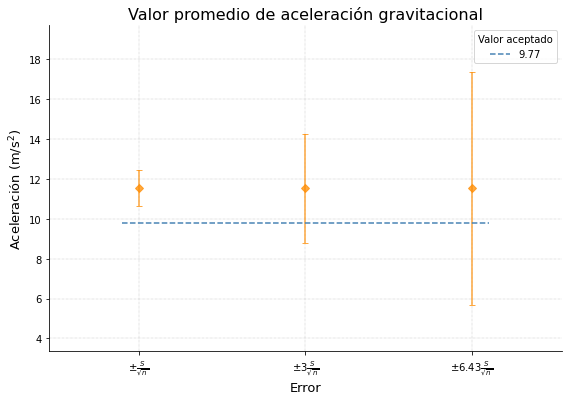

In [22]:
# Desarrollo de los literales para cada grupo:


# Grupo de 5

print('\nGrupo de 5 datos:\n')


#### a) ####

# Aceleración promedio

five_group_mean = np.mean(five_group)

# Error estándar 

five_group_standar = calculate_mean_deviation(five_group, five_group_mean, len(five_group))

# Resultados

print('Valor de la aceleración promedio:', five_group_mean, 'm/s^2')
print('Valor del error estándar:', five_group_standar, 'm/s^2\n')


#### b) ####

# Correción de t-student para una incerteza del 0.27% 

sample_size = len(five_group) # Tamaño de la muestra: 5
alpha = 0.997 # Certeza
degrees = sample_size - 1 # Grados de libertad
tstudent_value = stats.t.interval(alpha, degrees, loc=0, scale=1)[1] # El valor en la abscisa de la t-student

# Lista con los valores de las barras de error
five_group_error_bar = [1 * five_group_standar, 3 * five_group_standar, tstudent_value * five_group_standar]

# Valor de la correción t-student que se incluye en el plot: Descomentar para verificar valor
#tstudent_value_plot_five = np.round(tstudent_value, 2)
#print('Valor para la correción de t-student:', tstudent_value_plot_five) 


# Gŕafica

print('Gŕafica del valor promedio de la aceleración en el grupo de 5 datos, con los tres errores distintos:')

x = [1, 2, 3] # Posiciones para las etiquetas en el eje x
# Strings como etiquetas del eje x
labels = [r'$\pm \frac{S}{\sqrt{n}}$', r'$\pm3 \frac{S}{\sqrt{n}}$', r'$\pm6.43 \frac{S}{\sqrt{n}}$'] 

plt.figure(figsize = (9.2, 6.2)) # Para ajustar el tamaño de la gráfica

# Plot de la media con las barras de error
plt.errorbar(x, [five_group_mean]*3, yerr = five_group_error_bar, fmt='D', ms=5.4, alpha=0.75, capsize= 3.0, color = 'darkorange')

# Modificaciones del eje x
plt.xticks(x, labels, rotation = 'horizontal')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Valor promedio de aceleración gravitacional', fontsize = 16) # Título
plt.xlabel('Error', fontsize = 13) # label eje x
plt.ylabel(r'Aceleración (m/s$^2$)', fontsize = 13) # label eje y

# plot de líneas punteadas
plt.plot(np.linspace(0.9, 3.1, 50), [accepted_g]*len(np.linspace(0.9, 3.1, 50)), linestyle = 'dashed', color = 'steelblue', label = str(accepted_g))
plt.legend(title = 'Valor aceptado')

plt.show()


Grupo de 15 datos:

Valor de la aceleración promedio: 10.356563624727334 m/s^2
Valor del error estándar: 0.6285244270571558 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 15 datos, con los tres errores distintos:


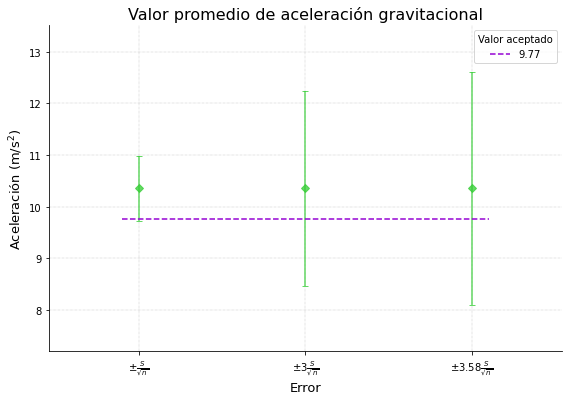

In [21]:
# Grupo de 15

print('\nGrupo de 15 datos:\n')


#### a) ####

# Aceleración promedio

fifteen_group_mean = np.mean(fifteen_group)

# Error estándar 

fifteen_group_standar = calculate_mean_deviation(fifteen_group, fifteen_group_mean, len(fifteen_group))

# Resultados

print('Valor de la aceleración promedio:', fifteen_group_mean, 'm/s^2')
print('Valor del error estándar:', fifteen_group_standar, 'm/s^2\n')


#### b) ####

# Correción de t-student para una incerteza del 0.27% 

sample_size = 15 # Tamaño de la muestra
alpha = 0.997 # Certeza
degrees = sample_size - 1 # Grados de libertad
tstudent_value = stats.t.interval(alpha, degrees, loc=0, scale=1)[1] # El valor en la abscisa de la t-student

# Lista con los valores de las barras de error
fifteen_group_error_bar = [1 * fifteen_group_standar, 3 * fifteen_group_standar, tstudent_value * fifteen_group_standar]

# Valor de la correción t-student que se incluye en el plot: Descomentar para verificar valor
# tstudent_value_plot_fifteen = np.round(tstudent_value, 2)
# print('Valor para la correción de t-student:', tstudent_value_plot_fifteen) # Descomentar para verificar valor


# Gŕafica

print('Gŕafica del valor promedio de la aceleración en el grupo de 15 datos, con los tres errores distintos:')

x = [1, 2, 3] # Posiciones para las etiquetas en el eje x
# Strings como etiquetas del eje x
labels = [r'$\pm \frac{S}{\sqrt{n}}$', r'$\pm3 \frac{S}{\sqrt{n}}$', r'$\pm3.58 \frac{S}{\sqrt{n}}$'] 

plt.figure(figsize = (9.2, 6.2)) # Para ajustar el tamaño de la gráfica

# Plot de la media con las barras de error
plt.errorbar(x, [fifteen_group_mean]*3, yerr = fifteen_group_error_bar, fmt='D', ms=5.4, alpha=0.75, capsize= 3.0, color = 'limegreen')

# Modificaciones del eje x
plt.xticks(x, labels, rotation = 'horizontal')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Valor promedio de aceleración gravitacional', fontsize = 16) # Título
plt.xlabel('Error', fontsize = 13) # label eje x
plt.ylabel(r'Aceleración (m/s$^2$)', fontsize = 13) # label eje y

# plot de líneas punteadas
plt.plot(np.linspace(0.9, 3.1, 50), [accepted_g]*len(np.linspace(0.9, 3.1, 50)), linestyle = 'dashed', color = 'darkviolet', label = str(accepted_g))
plt.legend(title = 'Valor aceptado')

plt.show()


Grupo de 30 datos:

Valor de la aceleración promedio: 10.058364886890176 m/s^2
Valor del error estándar: 0.4534655804408926 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 30 datos, con los tres errores distintos:


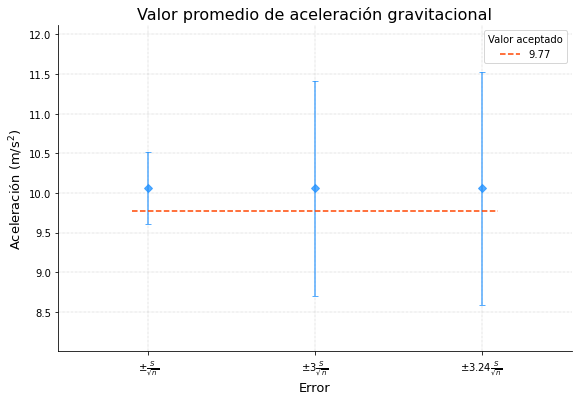

In [38]:
# Grupo de 30

print('\nGrupo de 30 datos:\n')


#### a) ####

# Se crea copia con otro nombre del array con todos los datos
all_group = np.copy(acceleration_sp_array)

# Aceleración promedio

all_group_mean = np.mean(all_group)

# Error estándar 

all_group_standar = calculate_mean_deviation(all_group, all_group_mean, len(all_group))

# Resultados

print('Valor de la aceleración promedio:', all_group_mean, 'm/s^2')
print('Valor del error estándar:', all_group_standar, 'm/s^2\n')


#### b) ####

# Correción de t-student para una incerteza del 0.27% 

sample_size = 30 # Tamaño de la muestra
alpha = 0.997 # Certeza
degrees = sample_size - 1 # Grados de libertad
tstudent_value = stats.t.interval(alpha, degrees, loc=0, scale=1)[1] # El valor en la abscisa de la t-student

# Lista con los valores de las barras de error
all_group_error_bar = [1 * all_group_standar, 3 * all_group_standar, tstudent_value * all_group_standar]

all_tstudent_correction = tstudent_value * all_group_standar 

# Valor de la correción t-student que se incluye en el plot: Descomentar para verificar valor
# tstudent_value_plot_all = np.round(tstudent_value, 2)
# print('Valor para la correción de t-student:', tstudent_value_plot_all) # Descomentar para verificar valor


# Gŕafica

print('Gŕafica del valor promedio de la aceleración en el grupo de 30 datos, con los tres errores distintos:')

x = [1, 2, 3] # Posiciones para las etiquetas en el eje x
# Strings como etiquetas del eje x
labels = [r'$\pm \frac{S}{\sqrt{n}}$', r'$\pm3 \frac{S}{\sqrt{n}}$', r'$\pm3.24 \frac{S}{\sqrt{n}}$'] 

plt.figure(figsize = (9.2, 6.2)) # Para ajustar el tamaño de la gráfica

# Plot de la media con las barras de error
plt.errorbar(x, [all_group_mean]*3, yerr = all_group_error_bar, fmt='D', ms=5.4, alpha=0.75, capsize= 3.0, color = 'dodgerblue')

# Modificaciones del eje x
plt.xticks(x, labels, rotation = 'horizontal')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Valor promedio de aceleración gravitacional', fontsize = 16) # Título
plt.xlabel('Error', fontsize = 13) # label eje x
plt.ylabel(r'Aceleración (m/s$^2$)', fontsize = 13) # label eje y

# plot de líneas punteadas
plt.plot(np.linspace(0.9, 3.1, 50), [accepted_g]*len(np.linspace(0.9, 3.1, 50)), linestyle = 'dashed', color = 'orangered', label = str(accepted_g))
plt.legend(title = 'Valor aceptado')

plt.show()

De manera general, con base en los resultados presentados se puede apreciar cómo, a medida que se consideran grupos con un mayor número de datos el valor medio de la aceleración gravitacional tiende a acercarse al valor aceptado, y el error estándar se va haciendo menor. Además puede verse cómo las barras de error de apenas un error estándar en los dos primeros grupos no representan un intervalo de mucho confiabilidad, al quedar la línea punteada por fuera o cerca a un extremo. También se puede ver claramente entonces que las barras de error de la correción t-student tienden a ser equivalentes con las tres errores estándar a medida que el número de datos aumenta.

Es de notarse además que de manera general hay una buena correspondencia de los datos con el valor aceptado para la aceleración, lo cual no se esperaría de unos datos en los cuales existiera un error sistemático debido al tiempo de reacción auditivo de $0.17$s. Por lo tanto, se podría afirmar que al iniciar y detener el cronómetro en ambos casos a partir de la audición, se eliminó de manera indirecta el factor humano del retraso que se podría encontrar en los tiempos tomados en este experimento.

Es por esto que ahora, con fines comparativos, se introducirá de manera directa el error sistemático en los datos, al restar el retraso de $0.17$s que los datos hubieran tenido si se hubiero llevado a cabo el experimento de manera distinta. Se realizan los mismos cálculos y se presentan el mismo tipo de gráficas que se observaron previamente.


Grupo de 5 datos:

Valor de la aceleración promedio: 21.565835091755844 m/s^2
Valor del error estándar: 2.966298144006895 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 5 datos, con los tres errores distintos:


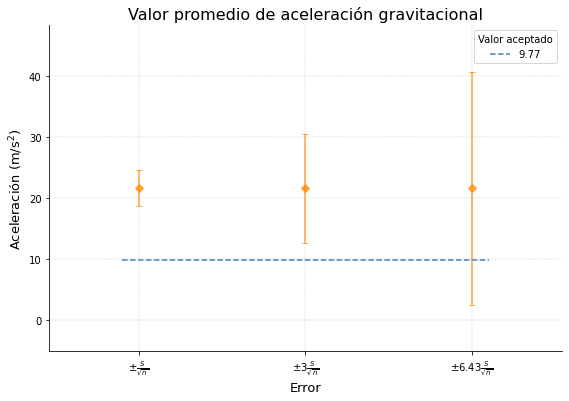

In [23]:
######  Versión modificada del experimento  ######


# Retraso al haber utilizado la audición para tomar los datos

hearing_delay = 0.17 # (s)

# Se adecuan los datos al restar el retraso como un error sistemático que los datos hubieran tenido

modified_stopwatch_data = stopwatch_data - hearing_delay

# Se calcula un array con las aceleraciones correspondientes a cada tiempo cronometrado

m_acceleration_sp_array = calculate_acceleration(height, modified_stopwatch_data)

# Se crea una semilla para fijar los valores aleatorios que se generen 

np.random.seed(21)

# Agrupación de los datos de manera aleatoria

# Lista con los índices del grupo de 5 datos

m_five_group_index = np.random.choice(range(30), 5, replace=False)

# Lista vacía para almacenar los valores del grupo de 5
m_five_group = []
for index in m_five_group_index:
    m_five_group.append(m_acceleration_sp_array[index]) # Se anexan los 5 valores elegidos aleatoriamente

m_five_group = np.array(m_five_group)

# Lista con los índices del grupo de 15 datos

m_fifteen_group_index = np.random.choice(range(30), 15, replace=False)

# Lista vacía para almacenar los valores del grupo de 15
m_fifteen_group = []
for index in m_fifteen_group_index:
    m_fifteen_group.append(m_acceleration_sp_array[index]) # Se anexan los 15 valores elegidos aleatoriamente

m_fifteen_group = np.array(m_fifteen_group)


# Grupo de 5

print('\nGrupo de 5 datos:\n')


#### a) ####

# Aceleración promedio

m_five_group_mean = np.mean(m_five_group)

# Error estándar 

m_five_group_standar = calculate_mean_deviation(m_five_group, m_five_group_mean, len(m_five_group))

# Resultados

print('Valor de la aceleración promedio:', m_five_group_mean, 'm/s^2')
print('Valor del error estándar:', m_five_group_standar, 'm/s^2\n')


#### b) ####

# Correción de t-student para una incerteza del 0.27% 

sample_size = 5 # Tamaño de la muestra
alpha = 0.997 # Certeza
degrees = sample_size - 1 # Grados de libertad
tstudent_value = stats.t.interval(alpha, degrees, loc=0, scale=1)[1] # El valor en la abscisa de la t-student

# Lista con los valores que tendrán las barras de error
m_five_group_error_bar = [1 * m_five_group_standar, 3 * m_five_group_standar, tstudent_value * m_five_group_standar]


# Gŕafica

print('Gŕafica del valor promedio de la aceleración en el grupo de 5 datos, con los tres errores distintos:')

x = [1, 2, 3] # Posiciones para las etiquetas en el eje x
# Strings como etiquetas del eje x
labels = [r'$\pm \frac{S}{\sqrt{n}}$', r'$\pm3 \frac{S}{\sqrt{n}}$', r'$\pm6.43 \frac{S}{\sqrt{n}}$'] 

plt.figure(figsize = (9.2, 6.2)) # Para ajustar el tamaño de la gráfica

# Plot del valor medio con las barras de error
plt.errorbar(x, [m_five_group_mean]*3, yerr = m_five_group_error_bar, fmt='D', ms=5.4, alpha=0.75, capsize= 3.0, color = 'darkorange')

# Modificaciones del eje x
plt.xticks(x, labels, rotation = 'horizontal')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Valor promedio de aceleración gravitacional', fontsize = 16) # Título
plt.xlabel('Error', fontsize = 13) # label eje x
plt.ylabel(r'Aceleración (m/s$^2$)', fontsize = 13) # label eje y

# plot de líneas punteadas
plt.plot(np.linspace(0.9, 3.1, 50), [accepted_g]*len(np.linspace(0.9, 3.1, 50)), linestyle = 'dashed', color = 'steelblue', label = str(accepted_g))
plt.legend(title = 'Valor aceptado')
plt.show()

Grupo de 15 datos:

Valor de la aceleración promedio: 21.47387908513515 m/s^2
Valor del error estándar: 1.8249384547673806 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 15 datos, con los tres errores distintos:


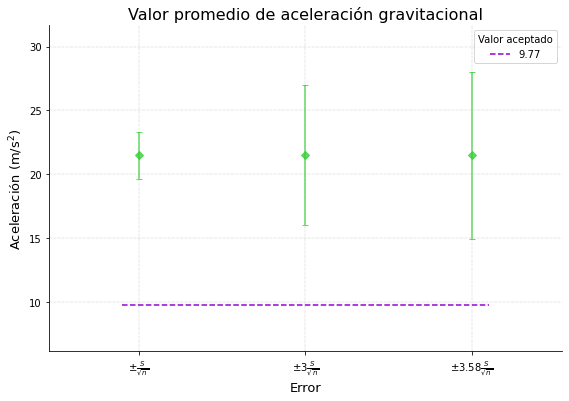

In [24]:
# Grupo de 15 datos

print('Grupo de 15 datos:\n')

#### a) ####

# Aceleración promedio

m_fifteen_group_mean = np.mean(m_fifteen_group)

# Error estándar 

m_fifteen_group_standar = calculate_mean_deviation(m_fifteen_group, m_fifteen_group_mean, len(m_fifteen_group))

# Resultados

print('Valor de la aceleración promedio:', m_fifteen_group_mean, 'm/s^2')
print('Valor del error estándar:', m_fifteen_group_standar, 'm/s^2\n')

#### b) ####

# Correción de t-student para una incerteza del 0.27% 

sample_size = 15 # Tamaño de la muestra
alpha = 0.997 # Certeza
degrees = sample_size - 1 # Grados de libertad
tstudent_value = stats.t.interval(alpha, degrees, loc=0, scale=1)[1] # El valor en la abscisa de la t-student

# Lista con los valores que tendrán las barras de error

m_fifteen_group_error_bar = [1 * m_fifteen_group_standar, 3 * m_fifteen_group_standar,tstudent_value * m_fifteen_group_standar]


# Gŕafica

print('Gŕafica del valor promedio de la aceleración en el grupo de 15 datos, con los tres errores distintos:')

x = [1, 2, 3] # Posiciones para las etiquetas en el eje x
# Strings como etiquetas del eje x
labels = [r'$\pm \frac{S}{\sqrt{n}}$', r'$\pm3 \frac{S}{\sqrt{n}}$', r'$\pm3.58 \frac{S}{\sqrt{n}}$'] 

plt.figure(figsize = (9.2, 6.2)) # Para ajustar el tamaño de la gráfica

# Plot de los valores medios con las barras de error
plt.errorbar(x, [m_fifteen_group_mean]*3, yerr = m_fifteen_group_error_bar, fmt='D', ms=5.4, alpha=0.75, capsize= 3.0, color = 'limegreen')

# Modificaciones del eje x
plt.xticks(x, labels, rotation = 'horizontal')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Valor promedio de aceleración gravitacional', fontsize = 16) # Título
plt.xlabel('Error', fontsize = 13) # label eje x
plt.ylabel(r'Aceleración (m/s$^2$)', fontsize = 13) # label eje y

# plot de líneas punteadas
plt.plot(np.linspace(0.9, 3.1, 50), [accepted_g]*len(np.linspace(0.9, 3.1, 50)), linestyle = 'dashed', color = 'darkviolet', label = str(accepted_g))
plt.legend(title = 'Valor aceptado')

plt.show()


Grupo de 30 datos:

Valor de la aceleración promedio: 19.278493215237233 m/s^2
Valor del error estándar: 1.199378364850798 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 30 datos, con los tres errores distintos:


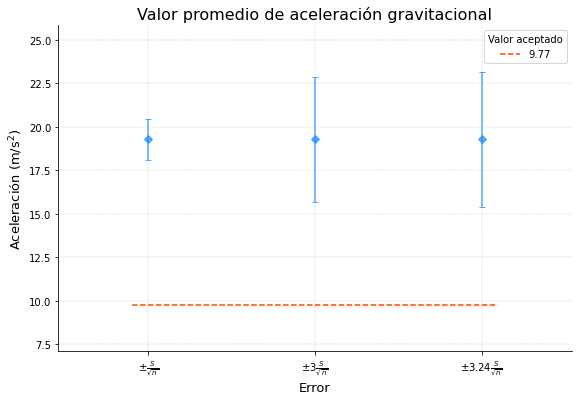

In [25]:
# Grupo de 30

print('\nGrupo de 30 datos:\n')

#### a) ####

# Se crea copia con otro nombre del array con todos los datos
m_all_group = np.copy(m_acceleration_sp_array)

# Aceleración promedio

m_all_group_mean = np.mean(m_all_group)

# Error estándar 

m_all_group_standar = calculate_mean_deviation(m_all_group, m_all_group_mean, len(m_all_group))

# Resultados

print('Valor de la aceleración promedio:', m_all_group_mean, 'm/s^2')
print('Valor del error estándar:', m_all_group_standar, 'm/s^2\n')


#### b) ####

# Correción de t-student para una incerteza del 0.27% 

sample_size = 30 # Tamaño de la muestra
alpha = 0.997 # Certeza
degrees = sample_size - 1 # Grados de libertad
tstudent_value = stats.t.interval(alpha, degrees, loc=0, scale=1)[1] # El valor en la abscisa de la t-student

# Lista con los valores que tendrán las barras de error
m_all_group_error_bar = [1 * m_all_group_standar, 3 * m_all_group_standar, tstudent_value * m_all_group_standar]


# Gŕafica

print('Gŕafica del valor promedio de la aceleración en el grupo de 30 datos, con los tres errores distintos:')

x = [1, 2, 3] # Posiciones para las etiquetas en el eje x
# Strings como etiquetas del eje x
labels = [r'$\pm \frac{S}{\sqrt{n}}$', r'$\pm3 \frac{S}{\sqrt{n}}$', r'$\pm3.24 \frac{S}{\sqrt{n}}$'] 

plt.figure(figsize = (9.2, 6.2)) # Para ajustar el tamaño de la gráfica

# Plot del valor medio con las barras de error
plt.errorbar(x, [m_all_group_mean]*3, yerr = m_all_group_error_bar, fmt='D', ms=5.4, alpha=0.75, capsize= 3.0, color = 'dodgerblue')

# Modificaciones del eje x
plt.xticks(x, labels, rotation = 'horizontal')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Valor promedio de aceleración gravitacional', fontsize = 16) # Título
plt.xlabel('Error', fontsize = 13) # label eje x
plt.ylabel(r'Aceleración (m/s$^2$)', fontsize = 13) # label eje y

# plot de líneas punteadas
plt.plot(np.linspace(0.9, 3.1, 50), [accepted_g]*len(np.linspace(0.9, 3.1, 50)), linestyle = 'dashed', color = 'orangered', label = str(accepted_g))
plt.legend(title = 'Valor aceptado')

plt.show()

Con base en estos resultados se puede ver claramente cómo al introducir un error sistemático, los valores medios se alejan mucho más del valor aceptado, como sería de esperarse. El único caso en que el valor aceptado alcanza a encontrarse en el intervalo de las barras de error es para el grupo de 5 datos donde la correción de t-student abarca un rango de valores muy amplio.

<a id='cuarto'></a>
### 4.

Con los datos de tiempo de caída originales tomados con el cronometro, se calcula el error porcentual con respecto al valor aceptado de la aceleración de la gravedad, para cada grupo de datos. 

In [36]:
# Función para calcular el error porcentual
calculate_porcentual_error = lambda observed_value, expected_value: np.abs((observed_value - expected_value) / expected_value) * 100

# Se calcula el error porcentual para cada grupo

porcentual_error_five = calculate_porcentual_error(five_group_mean, accepted_g) # grupo de 5 datos
porcentual_error_fifteen = calculate_porcentual_error(fifteen_group_mean, accepted_g) # grupo de 15 datos
porcentual_error_all = calculate_porcentual_error(all_group_mean, accepted_g) # grupo de 30 datos

#Resultados
print('\nErrores porcentuales:\nGrupo de 5 datos:',porcentual_error_five,'%\nGrupo de 15 datos:', porcentual_error_fifteen,'%')
print('Grupo de 30 datos:',porcentual_error_all,'%\n')


Errores porcentuales:
Grupo de 5 datos: 18.05097200591978 %
Grupo de 15 datos: 6.003721849819189 %
Grupo de 30 datos: 2.951534154454216 %



Como se pudo observar desde los resultados de [3.](#tercero), a medida que se aumenta el número de datos la correspondencia de los valores medios de la aceleración con respecto al valor aceptado se hace mejor, y por lo tanto el error porcentual también decrece. Entonces, en este caso, tomar un mayor número de datos representa obtener una mejor aproximación de la aceleración gravitaciónal.

### 5.

A la vez que se tomaron de manera manual los datos de los tiempos de caída con el cronómetro, también se registró con el cronómetro acústico de Phyphox estos mismos tiempos. A continuación se presentan los datos registrados. Los errores que tienen estos tiempos de acuerdo con la sensibilidad que Phyphox entrega los resultados es $\pm 2\times10^{-15}$s. Se vuelve a desarrollar el numeral [2.](#segundo) con estos nuevos datos.


Datos correspondientes a los tiempos de Phyphox en segundos (redondeados a 6 CS):

                                                            
  0.647208  0.659396  0.680792  0.671708  0.619104  0.646250
  0.597417  0.650729  0.635229  0.615646  0.608542  0.619750
  0.635063  0.634437  0.605083  0.609313  0.631896  0.637062
  0.618667  0.630583  0.626958  0.616542  0.636312  0.627458
  0.622250  0.628104  0.651542  0.613396  0.625938  0.618021


Valor medio de los tiempos registrados con phyphox: ( 0.631 ± 0.003 ) s

Gráfica de los residuos de los tiempos tomados con Phyhox con respecto al valor medio:



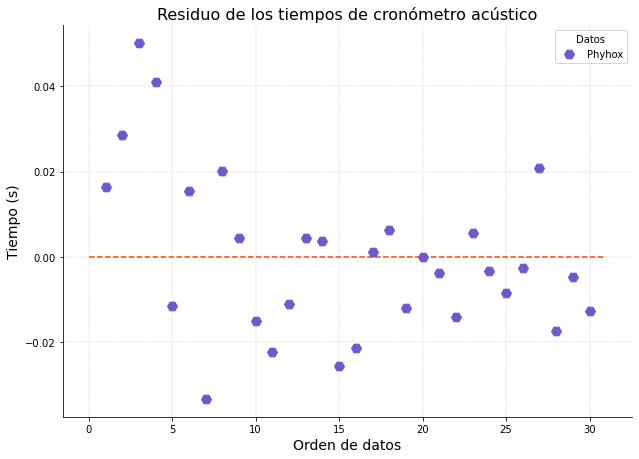

In [29]:
# Datos tomados con el cronómetro acústico de Phyphox

phyphox_data = np.array([0.647208333333334, 0.659395833333333, 0.680791666666666, 0.671708333333334, 0.619104166666667,
                        0.64625, 0.597416666666666, 0.650729166666667, 0.635229166666667, 0.615645833333333,
                        0.608541666666666, 0.61975, 0.635062500000001, 0.6344375, 0.605083333333333,
                        0.6093125, 0.631895833333334, 0.637062499999999, 0.618666666666667, 0.630583333333334,
                        0.626958333333333, 0.616541666666667, 0.6363125, 0.627458333333334, 0.622250000000001,
                        0.628104166666667, 0.651541666666667, 0.613395833333333, 0.6259375, 0.618020833333333])


# Para imprimir los datos en forma de tabla

# Se crea matriz vacía donde se guardan los datos por columnas

pp_time_matrix = [[], [], [], [], [], []]

# Se recorre el array de los tiempos tomados para guardarlos en la matriz

for i in range(len(pp_time_matrix)):
    for j in range(5):
        pp_time_matrix[i].append(phyphox_data[(j * len(pp_time_matrix)) + i])
    

data_dictionary = {} # diccionario vacío para crear un data frame
column_header = [] # lista vacía para los nombres de las columnas

# Se guardan los elementos de la matriz como las columnas que tendrá el dataframe
for i in range(len(pp_time_matrix)):
    data_dictionary[str(i + 1)] = list(pp_time_matrix[i]) 
    column_header.append(str(i + 1))

# Se crea el Dataframe
df = pd.DataFrame (data_dictionary, columns = column_header)

def print_df(df):
    # Función para imprimir el dataframe sin los nombres de las columnas
    # ni la columna de índices
    df_ = df.copy()
    df_.columns = ['', '', '', '', '', '']
    df_.index = ['' for _ in range(len(df))]
    print(df_)

print('\nDatos correspondientes a los tiempos de Phyphox en segundos (redondeados a 6 CS):\n')
print_df(df)


#####   Numeral 2   #####

# Se calcula la media de los datos

mean_phyphox_time = np.mean(phyphox_data)

# Se calcula el error sobre la media

mean_phyphox_error = calculate_mean_error(phyphox_data, mean_phyphox_time, 2e-15)

# Se redondea a 1 cifra significativa

mean_phyphox_error =  np.round(mean_phyphox_error, 3)


# Resultado

print('\n\nValor medio de los tiempos registrados con phyphox: (', np.round(mean_phyphox_time, 3),'±', mean_phyphox_error, ') s')

# Se calcula los residuos con respecto a la media

phyphox_residue = phyphox_data - mean_phyphox_time

data_order = np.arange(1,31)


# Gráfica de los residuos

print('\nGráfica de los residuos de los tiempos tomados con Phyhox con respecto al valor medio:\n')

plt.figure(figsize = (10.2,7.2)) # Para ajustar el tamaño de la gráfica
# Plot del conjunto de datos experimentales y simulados
plt.plot(data_order, phyphox_residue, color = 'slateblue', marker = 'H', ms = 10, ls = 'None', label = 'Phyhox')
plt.hlines(0,0,31,colors='orangered',ls='--') # Para crear línea punteada en y = 0
plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
plt.gca().spines['top'].set_visible(False) # Modificación de la figura
plt.gca().spines['right'].set_visible(False) # Modificación de la figura
plt.title('Residuo de los tiempos de cronómetro acústico', fontsize = 16) # Título
plt.xlabel('Orden de datos', fontsize = 14) # label eje x
plt.ylabel('Tiempo (s)', fontsize = 14) # label eje y
plt.legend(title = 'Datos')
plt.show()


Con base en el resultado de la media, y a partir de los mismos datos, se puede notar que la aplicación Phyphox ofrece una mayor precisión para registrar los tiempos de caída. Al igual que en el caso de la gráfica de residuos para los datos tomados con cronómetro, se puede observar que existe una aleatoriedad de la distribución de estos residuos alrededor del la línea del $0$, ya que no se puede ver con claridad un patrón que los organice. Sin embargo, en este caso se puede notar que los datos más alejados de la media se encuentran entre los primeros tomados, y a partir de aproximadamente el dato 10 hay una mayor concentración de los puntos por debajo del $0$.

Ahora se realiza nuevamente el numeral [3.](#tercero) con las medidas de Phyphox.

In [30]:
# Numeral 3

# Se calcula un array con las aceleraciones correspondientes a cada tiempo registrado

acceleration_pp_array = calculate_acceleration(height, phyphox_data)

np.random.seed(15) # semilla para fijar los valores aleatorios que se generen 

# Definimos una función para realizar el desarrollo con cada grupo de datos

def group_calculation(n):
    
    '''
    Función para desarrollar los literales a y b del numeral 3, utilizando las aceleraciones
    calculadas para los tiempos tomados con phyphox.
    
    Inputs:
    - n : número de datos del grupo
    
    Outputs:
    - group_mean: valor medio de la aceleración gravitacional para el grupo de n datos
    '''
    
    np.random.seed(15)
    
    # Agrupación de los datos de manera aleatoria
    # Lista con los índices del grupo de n datos
    
    group_index = np.random.choice(range(30), n, replace=False)
    
    # Lista vacía para almacenar los valores del grupo 
    group = []
    for index in group_index:
        group.append(acceleration_pp_array[index]) # Se anexan los n valores elegidos aleatoriamente

        
    #### a) ####
    
    # Aceleración promedio

    group_mean = np.mean(group)
    
    # Error estándar 
    
    group_standar = calculate_mean_deviation(group, group_mean, len(group))
    
    # Resultados
    
    print('Valor de la aceleración promedio:', group_mean, 'm/s^2')
    print('Valor del error estándar:', group_standar, 'm/s^2\n')
    
    
    #### b) ####
    
    # Correción de t-student para una incerteza del 0.27% 
    
    sample_size = n # Tamaño de la muestra
    alpha = 0.997 # Certeza
    degrees = sample_size - 1 # Grados de libertad
    tstudent_value = stats.t.interval(alpha, degrees, loc=0, scale=1)[1] # El valor en la abscisa de la t-student
    
    # Lista de valores que tendrán las barras de error
    group_error_bar = [1 * group_standar , 3 * group_standar, tstudent_value * group_standar]

    
    # Gŕafica
    
    print(f"Gŕafica del valor promedio de la aceleración en el grupo de {n} datos, con los tres errores distintos:")
    
    
    x = [1, 2, 3] # Posiciones para las etiquetas en el eje x
    # Strings como etiquetas del eje x
    labels = [r'$\pm \frac{S}{\sqrt{n}}$', r'$\pm3 \frac{S}{\sqrt{n}}$']
    
    plt.figure(figsize = (9.2, 6.2)) # Para ajustar el tamaño de la gráfica
    
    # Solo son de interés los casos n = 5, 15, 30
    if n == 5:
        labels.append(r'$\pm6.43 \frac{S}{\sqrt{n}}$')
    elif n == 15:
        labels.append(r'$\pm3.58 \frac{S}{\sqrt{n}}$')
    elif n == 30:
        labels.append(r'$\pm3.24 \frac{S}{\sqrt{n}}$')
    else:
        labels.append('t-student')
    
    # Plot de la media con las distintas barras de error
    plt.errorbar(x, [group_mean]*3, yerr = group_error_bar, fmt='D', ms=5.4, alpha=0.75, capsize= 3.0, color = 'royalblue')
    
    # Modificaciones del eje x
    plt.xticks(x, labels, rotation = 'horizontal')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    
    plt.grid(color='silver', linestyle='-.', linewidth=0.4) # Malla transparente 
    plt.gca().spines['top'].set_visible(False) # Modificación de la figura
    plt.gca().spines['right'].set_visible(False) # Modificación de la figura
    plt.title('Valor promedio de aceleración gravitacional', fontsize = 16) # Título
    plt.xlabel('Error', fontsize = 13) # label eje x
    plt.ylabel(r'Aceleración (m/s$^2$)', fontsize = 13) # label eje y
    
    # plot de líneas punteadas
    plt.plot(np.linspace(0.9, 3.1, 50), [accepted_g]*len(np.linspace(0.9, 3.1, 50)), linestyle = 'dashed', color = 'crimson', label = str(accepted_g))
    plt.legend(title = 'Valor aceptado')
    
    plt.show()
    
    return group_mean


Grupo de 5 datos:

Valor de la aceleración promedio: 10.302527679599152 m/s^2
Valor del error estándar: 0.2018835927753058 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 5 datos, con los tres errores distintos:


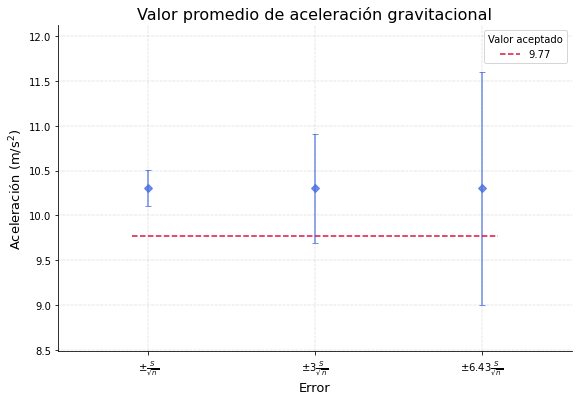

In [31]:
# Para 5 datos
print('\nGrupo de 5 datos:\n')
five_group_pp_mean = group_calculation(5)


Grupo de 15 datos:

Valor de la aceleración promedio: 10.059332642837857 m/s^2
Valor del error estándar: 0.1921943028727544 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 15 datos, con los tres errores distintos:


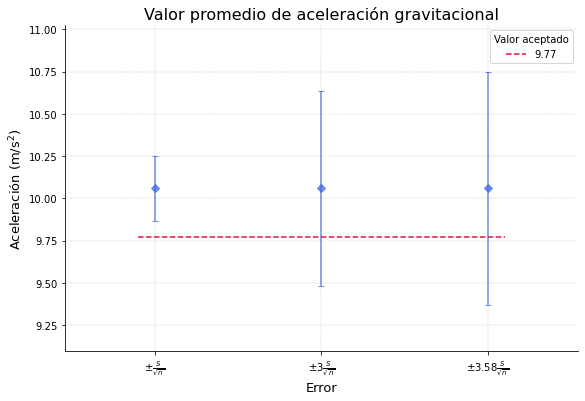

In [32]:
# Para 15 datos
print('\nGrupo de 15 datos:\n')
fifteen_group_pp_mean = group_calculation(15) 


Grupo de 30 datos:

Valor de la aceleración promedio: 10.082543691021845 m/s^2
Valor del error estándar: 0.10843090489159357 m/s^2

Gŕafica del valor promedio de la aceleración en el grupo de 30 datos, con los tres errores distintos:


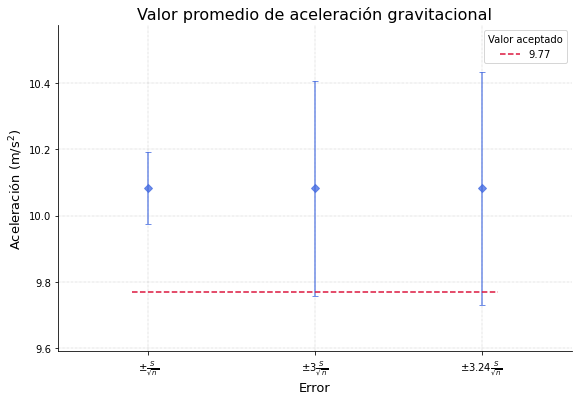

In [33]:
# Para 30 datos
print('\nGrupo de 30 datos:\n')
all_group_pp_mean = group_calculation(30) 

A diferencia de lo que se encontró en [3.](#tercero) con los datos originales cronometrados, con los datos de Phyphox se puede ver que no necesariamente se cumple que un mayor número de datos representa una mejor aproximación al valor aceptado, ya que la aceleración promedio del grupo de 30 datos es mayor que la del de 15. Sin embargo, sí se sigue presentando que un mayor número de datos tiene como consecuencia un error estándar más pequeño. Otra diferencia que se observa en estos resultados es que en este caso en ninguno de los tres grupos las barras de error de un error estándar abarcan el valor aceptado. Además, la línea punteada tiende a estar muy en los extremos de las barras de error. Esto puede ser debido a que los valores de los errores estándar son más pequeños que en comparación con los obtenidos en [3.](#tercero), para cualquiera de los tres grupos.


Se calculan los errores porcentuales de [4.](#cuarto) para los datos de Phyphox.

In [35]:
# Numeral 4

# Se calcula el error porcentual para cada grupo

porcentual_error_five_pp = calculate_porcentual_error(five_group_pp_mean, accepted_g) # grupo de 5 datos
porcentual_error_fifteen_pp = calculate_porcentual_error(fifteen_group_pp_mean, accepted_g) # grupo de 15 datos
porcentual_error_all_pp = calculate_porcentual_error(all_group_pp_mean, accepted_g) # grupo de 30 datos

#Resultados
print('\nErrores porcentuales:\nGrupo de 5 datos:',porcentual_error_five_pp,'%\nGrupo de 15 datos:', porcentual_error_fifteen_pp,'%')
print('Grupo de 30 datos:', porcentual_error_all_pp,'%\n')


Errores porcentuales:
Grupo de 5 datos: 5.450641551680165 %
Grupo de 15 datos: 2.9614395377467506 %
Grupo de 30 datos: 3.199014237685218 %



Vemos que en este caso para los dos primeros grupos se tiene un porcentaje más pequeño que los de [4.](#cuarto), pero cuando se consideran todos los datos este porcentaje se hace más grande, un comportamiento que ya se podía notar desde las gráficas presentadas previamente, donde el valor medio de la aceleración para todos los datos se alejaba del valor aceptado con respecto al grupo de 15 datos.

### 6.

A partir de los resultados que se obtuvieron para los valores medios de la aceleración gravitacional, tanto los que se calcularon a partir de los tiempos tomados con cronómetro como los que se obtuvieron de los datos de Phyphox, se presenta el valor que tuvo el error porcentual más pequeño y con la corrección de t-student para una incerteza del 0.27%.

In [44]:
# El resultado con menor error porcentual

error_best_value = int(np.round(all_tstudent_correction, 0)) # Redondeado a una cifra sigificativa

# Redondeado de acuerdo con el error 
g_best_value = int(np.round(all_group_mean, 0))

print('\nValor medio grupo de 30 datos de tiempos con cronómetro:', all_group_mean, 'm/s²')
print('Correción de t-student:', all_tstudent_correction, 'm/s²\n')
print(f"Entonces, con un error porcentual de {porcentual_error_all}% se obtuvo como valor para la aceleración gravitacional:")
print(f"g = ({g_best_value} ± {error_best_value}) m/s²")
print('Valor aceptado utilizado:', accepted_g, 'm/s²\n')


Valor medio grupo de 30 datos de tiempos con cronómetro: 10.058364886890176 m/s²
Correción de t-student: 1.468960968374656 m/s²

Entonces, con un error porcentual de 2.951534154454216% se obtuvo como valor para la aceleración gravitacional:
g = (10 ± 1) m/s²
Valor aceptado utilizado: 9.77 m/s²



Con base en este resultado, puede afirmarse que hay una buena correspondencia entre el mejor valor obtenido y el valor que se tomó como aceptado de aceleración gravitacional. Si se tomara uno de los resultados obtenidos de los datos de Phyphox, se podría reportar un valor más preciso ya que el error estándar es maś pequeño.

